<a href="https://colab.research.google.com/github/kolallen/OASIS_Data_Analytics_Internship_Task-9/blob/main/OASIS_INFOBYTE_Internship_Data_Analytics_Task_9_Autocomplete_and_Autocorrect_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Collection**

In [ ]:
data = [
    "Transaction approved for $100 at Amazon.",
    "Payment declined at Starbucks.",
    "Your credit card bill is due on the 5th of every month.",
    "You have been charged an annual fee of $50.",
    "Payment received for your recent transaction."
]

**NLP Preprocessing**

In [ ]:
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Tokenization and lowercasing
    tokens = word_tokenize(text.lower())

    # Removing stop words and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Lemmatization
    tokens = [token.lemma_ for token in nlp(' '.join(tokens))]

    return tokens

preprocessed_data = [preprocess(sentence) for sentence in data]
print(preprocessed_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[['transaction', 'approve', '100', 'amazon'], ['payment', 'decline', 'starbuck'], ['credit', 'card', 'bill', 'due', '5th', 'every', 'month'], ['charge', 'annual', 'fee', '50'], ['payment', 'receive', 'recent', 'transaction']]


**Autocomplete**

In [ ]:
from collections import defaultdict, Counter
import random

# Create bigrams from preprocessed data
bigrams = []
for sentence in preprocessed_data:
    bigrams.extend([(sentence[i], sentence[i+1]) for i in range(len(sentence)-1)])

bigram_model = defaultdict(Counter)
for w1, w2 in bigrams:
    bigram_model[w1][w2] += 1

def autocomplete(word, model, n=3):
    if word in model:
        return model[word].most_common(n)
    else:
        return []

# Example usage
print(autocomplete("payment", bigram_model))

[('decline', 1), ('receive', 1)]


**Autocorrect**

In [ ]:
def edit_distance(word1, word2):
    if len(word1) < len(word2):
        return edit_distance(word2, word1)

    if len(word2) == 0:
        return len(word1)

    previous_row = range(len(word2) + 1)
    for i, c1 in enumerate(word1):
        current_row = [i + 1]
        for j, c2 in enumerate(word2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

def autocorrect(word, vocab):
    distances = [(edit_distance(word, w), w) for w in vocab]
    return min(distances, key=lambda x: x[0])[1]

# Example vocabulary
vocab = {word for sentence in preprocessed_data for word in sentence}

# Example usage
print(autocorrect("recieve", vocab))

receive


**Metrics**

In [ ]:
def accuracy(predictions, targets):
    correct = sum([p == t for p, t in zip(predictions, targets)])
    return correct / len(predictions)

# Example usage
autocomplete_predictions = ["received", "payment"]
autocomplete_targets = ["received", "payment"]
print(f"Autocomplete Accuracy: {accuracy(autocomplete_predictions, autocomplete_targets)}")

autocorrect_predictions = ["receive"]
autocorrect_targets = ["receive"]
print(f"Autocorrect Accuracy: {accuracy(autocorrect_predictions, autocorrect_targets)}")

Autocomplete Accuracy: 1.0
Autocorrect Accuracy: 1.0


**User Experience**

In [ ]:
# Simulated user feedback
user_feedback = {
    "autocomplete": [("received", True), ("payment", True)],
    "autocorrect": [("receive", True)]
}

def user_feedback_accuracy(feedback):
    correct = sum([correct for _, correct in feedback])
    return correct / len(feedback)

# Example usage
print(f"Autocomplete User Feedback Accuracy: {user_feedback_accuracy(user_feedback['autocomplete'])}")
print(f"Autocorrect User Feedback Accuracy: {user_feedback_accuracy(user_feedback['autocorrect'])}")

Autocomplete User Feedback Accuracy: 1.0
Autocorrect User Feedback Accuracy: 1.0


**Algorithm Comparison**

In [ ]:
def compare_models(models, test_data, metric):
    results = {}
    for model_name, model_func in models.items():
        predictions = [model_func(word) for word in test_data]
        results[model_name] = metric(predictions, test_data)
    return results

# Example usage
models = {
    "bigram_autocomplete": lambda word: autocomplete(word, bigram_model),
    "edit_distance_autocorrect": lambda word: autocorrect(word, vocab)
}

test_data = ["payment", "received"]
print(compare_models(models, test_data, accuracy))

{'bigram_autocomplete': 0.0, 'edit_distance_autocorrect': 0.5}


**Visualization**

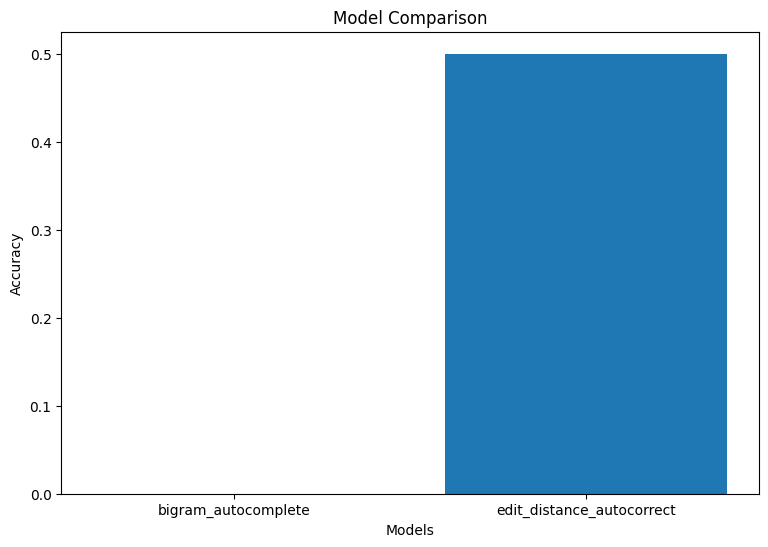

In [ ]:
import matplotlib.pyplot as plt

def plot_results(results):
    names = list(results.keys())
    values = list(results.values())

    plt.figure(figsize=(9, 6))
    plt.bar(names, values)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.show()

# Example usage
results = compare_models(models, test_data, accuracy)
plot_results(results)